### Testing of the models


In [1]:
# Below 4 lines needed to reload function definitions (after editing the project_functions.py file)
import sys, importlib
from projectFunctions import *
importlib.reload(sys.modules['projectFunctions'])
from projectFunctions import *




1 Physical GPUs, 1 Logical GPUs
Setup Mixed Precision
Mixed Precision policy applied
1 Physical GPUs, 1 Logical GPUs
Setup Mixed Precision
Mixed Precision policy applied


In [2]:
# Read validation data
#file = h5py.File("../data/Test/SetBOQ.AX.h5", "r")
file = h5py.File("../data/SetAPT.AX.h5", "r")

test_set_x,test_set_y = file["set_x"][:],file["set_y"][:]
file.close()
print(test_set_x.shape)

# Create a new model instance
#model = model_FC()

# Restore the weights
#model.load_weights('../checkpoints/my_checkpoint')

# Restore model
model = tf.keras.models.load_model("../data/checkpoints/model.h5")




(577, 128, 128, 3)


In [24]:
test_set_x,test_set_y = readXYfromDisk(noOfFiles=3,folder='../data/Test') 
values, counts = np.unique(test_set_y, axis=0, return_counts=True)

test_set_y

X Shape :  (11518, 128, 128, 3) Memory size is : 539.90625 Mb Y Shape:  (11518,)
Values, counts, Avg Performance :  [0 1 2] [7845 1781 1892] [0.68110783 0.15462754 0.16426463]


array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [25]:
counts.sum()/counts/2

array([0.73409815, 3.23357664, 3.04386892])

In [26]:
test_set_y = tf.one_hot(test_set_y,3)
values, counts = np.unique(test_set_y, axis=0, return_counts=True)
counts.sum()/counts/2

array([3.04386892, 3.23357664, 0.73409815])

In [27]:
test_set_y

<tf.Tensor: shape=(11518, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)>

In [18]:

# Evaluate the model
loss,acc = model.evaluate(test_set_x, test_set_y, verbose=2)

preds = model.predict(test_set_x)
classes = np.argmax(preds, axis = 1)

print(acc)
pd.crosstab(classes,test_set_y)

0.6447140574455261


col_0,0,1,2
row_0,,,
0,213,80,63
1,3,47,20
2,8,31,112


In [35]:
from sklearn.metrics import f1_score
f1_score(test_set_y,classes,average='weighted')


0.6168236800254792

In [ ]:
np.where(classes==1)

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow((test_set_x[0]).astype('uint8'))
ax[1].imshow((test_set_x[1]).astype('uint8'))


### 15Jul20 : Batch size and Learning rate

* Five layers
* 256 units relu
* BN every layer
* Default initialiser for relu

### 16Jul20

Double the architecture to confirm 
* Lower batch size of 128 was better than 256
* LR of 1e-5 was giving higher val_accuracy compared to 1e-6
* Higher LR rate was giving better results

## Need to find new batch and LR for this architecture

In [ ]:
df = pd.read_csv("../amitL2_high.txt")
plotExperiments(df)

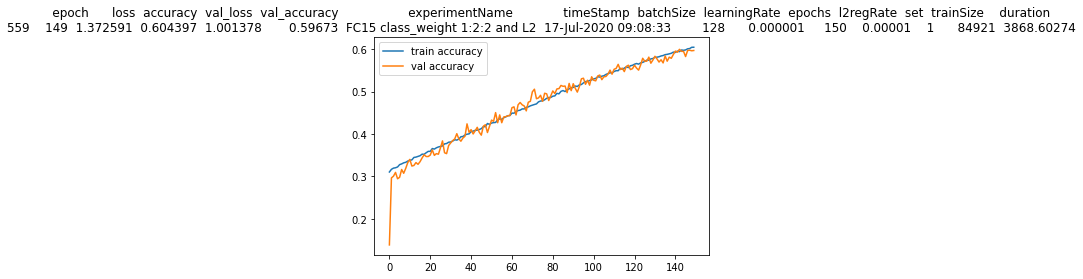

In [12]:
plotExperiments(df[df['timeStamp'] == '17-Jul-2020 09:08:33'])

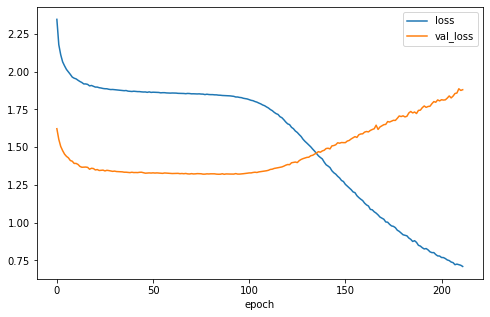

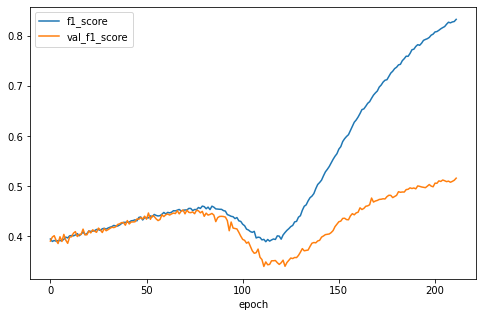

In [14]:
df = pd.read_csv("../data/callbacks/csvlogger/callbackCSV_FC15_20200718_F1Score50.csv")

df.plot('epoch',['loss','val_loss'],figsize=(8, 5)) 
df.plot('epoch',['f1_score','val_f1_score'],figsize=(8, 5)) 